# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer ,KNNImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data understanding and exploration

In [ ]:
d1 = pd.read_csv(R'/content/drive/MyDrive/GL AIML/Progress/Mini Projects/Ensemble Techniques/MP_ET_DT/TelcomCustomer-Churn_1.csv')
d2 = pd.read_csv(R'/content/drive/MyDrive/GL AIML/Progress/Mini Projects/Ensemble Techniques/MP_ET_DT/TelcomCustomer-Churn_2.csv')
d1.shape

(7043, 10)

In [ ]:
d1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [ ]:
d2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [ ]:
df = pd.merge(left=d1,right=d2,how='inner',on  = 'customerID')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
def colval(l):
    left_out = []
    for i in l:
        if i in list(df.columns):
            pass
        else:
            left_out.append(i)
    return left_out

colval(list(d1.columns))
colval(list(d2.columns))

[]

# Data Cleaning and Analysis

In [ ]:
df = df.iloc[:,1:]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df =df.convert_dtypes()
df.dtypes

gender               string
SeniorCitizen         Int64
Partner              string
Dependents           string
tenure                Int64
PhoneService         string
MultipleLines        string
InternetService      string
OnlineSecurity       string
OnlineBackup         string
DeviceProtection     string
TechSupport          string
StreamingTV          string
StreamingMovies      string
Contract             string
PaperlessBilling     string
PaymentMethod        string
MonthlyCharges      Float64
TotalCharges         string
Churn                string
dtype: object

In [ ]:
df.quantile(q=0.5).describe()

count     3.000000
mean     33.116667
std      35.355209
min       0.000000
25%      14.500000
50%      29.000000
75%      49.675000
max      70.350000
Name: 0.5, dtype: float64



> Imputing missing values



In [ ]:
t = df['TotalCharges'] == ' '
t.value_counts()

False    7032
True       11
Name: TotalCharges, dtype: Int64

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.NaN)
t = df['TotalCharges'] == ' '
t.value_counts()

False    7032
Name: TotalCharges, dtype: Int64

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
label_enc = LabelEncoder()
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod','Churn']:
        a = df[col].unique()
        df[col] = label_enc.fit_transform(df[col])
        print(a,'=',df[col].unique())

df.head()

<StringArray>
['Female', 'Male']
Length: 2, dtype: string = [0 1]
<IntegerArray>
[0, 1]
Length: 2, dtype: Int64 = [0 1]
<StringArray>
['Yes', 'No']
Length: 2, dtype: string = [1 0]
<StringArray>
['No', 'Yes']
Length: 2, dtype: string = [0 1]
<StringArray>
['No', 'Yes']
Length: 2, dtype: string = [0 1]
<StringArray>
['No phone service', 'No', 'Yes']
Length: 3, dtype: string = [1 0 2]
<StringArray>
['DSL', 'Fiber optic', 'No']
Length: 3, dtype: string = [0 1 2]
<StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: string = [0 2 1]
<StringArray>
['Yes', 'No', 'No internet service']
Length: 3, dtype: string = [2 0 1]
<StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: string = [0 2 1]
<StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: string = [0 2 1]
<StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: string = [0 2 1]
<StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: string = [0 2 1]
<StringArray>
['Mont

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.3,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.7,151.65,1


In [ ]:
df_na_data = df[df['TotalCharges'].isnull()==True]
df_na_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,NaN,0
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,NaN,0
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,NaN,0
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,NaN,0
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,NaN,0


In [ ]:
print(len(df_na_data.columns) ,len(df.columns))

20 20


In [ ]:
pd.NA = np.NaN
knn_imputer = KNNImputer(missing_values = np.NaN,weights = 'distance',n_neighbors=2)
knn_imputer.fit(df)
imputed_data_pre = knn_imputer.transform(df_na_data)
df_imputed_data_pre = pd.DataFrame(imputed_data_pre,columns = df.columns)
df_imputed_data_pre.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,52.55,54.225435,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,20.25,20.404847,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,3.0,80.85,80.547987,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,25.75,25.209200,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,56.05,55.138865,0.0


In [ ]:
df_imputed_data_pre[df_imputed_data_pre['TotalCharges'].isnull()==True].value_counts()

Series([], dtype: int64)

In [ ]:
df_imputed_data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            11 non-null     float64
 1   SeniorCitizen     11 non-null     float64
 2   Partner           11 non-null     float64
 3   Dependents        11 non-null     float64
 4   tenure            11 non-null     float64
 5   PhoneService      11 non-null     float64
 6   MultipleLines     11 non-null     float64
 7   InternetService   11 non-null     float64
 8   OnlineSecurity    11 non-null     float64
 9   OnlineBackup      11 non-null     float64
 10  DeviceProtection  11 non-null     float64
 11  TechSupport       11 non-null     float64
 12  StreamingTV       11 non-null     float64
 13  StreamingMovies   11 non-null     float64
 14  Contract          11 non-null     float64
 15  PaperlessBilling  11 non-null     float64
 16  PaymentMethod     11 non-null     float64
 17 

In [ ]:
df = df.dropna()
df.shape

(7032, 20)

In [ ]:
df_imputed_data_pre.shape

(11, 20)

In [ ]:
df = pd.concat([df,df_imputed_data_pre])
df.shape

(7043, 20)

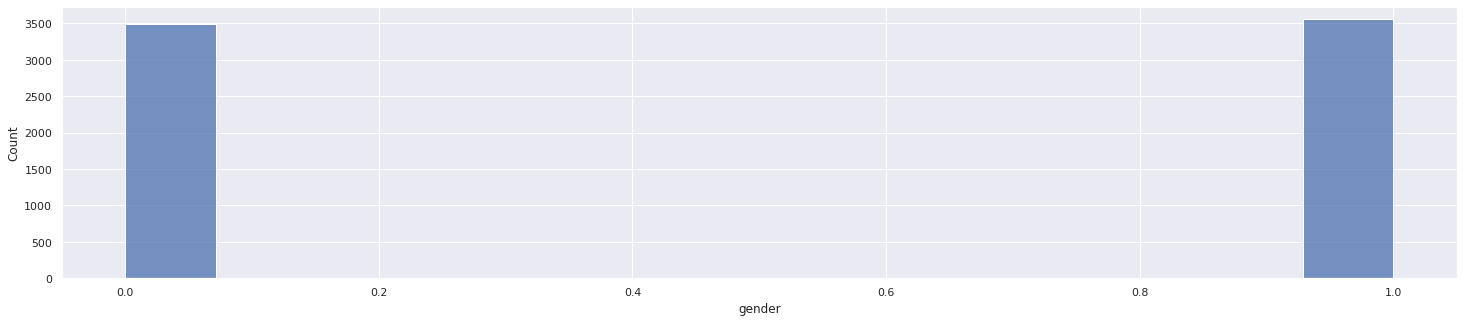

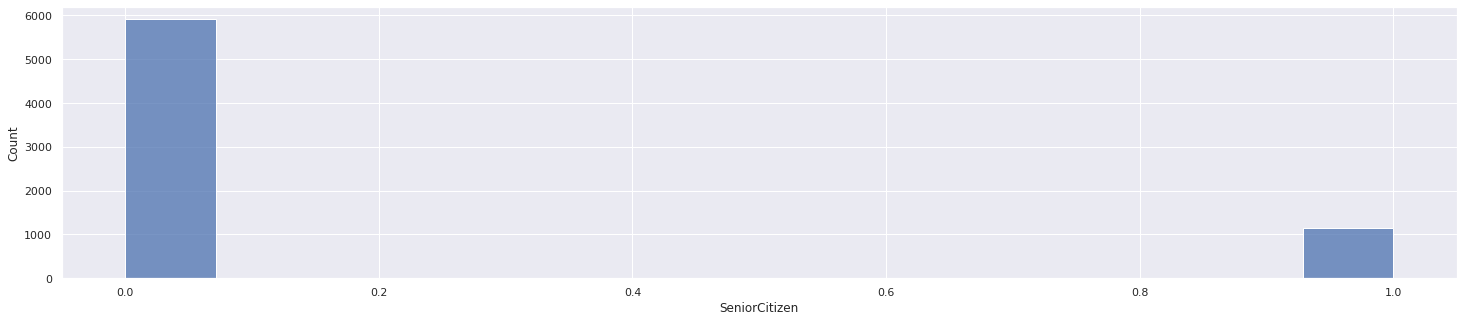

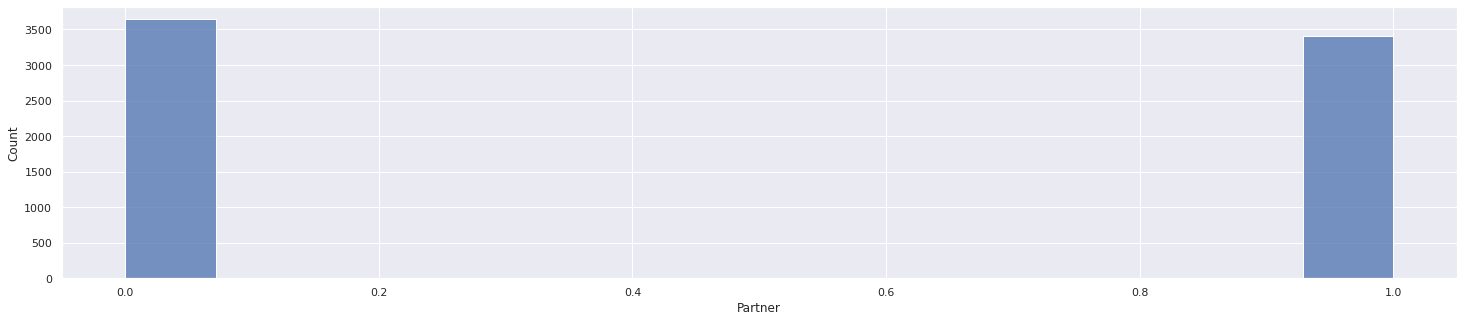

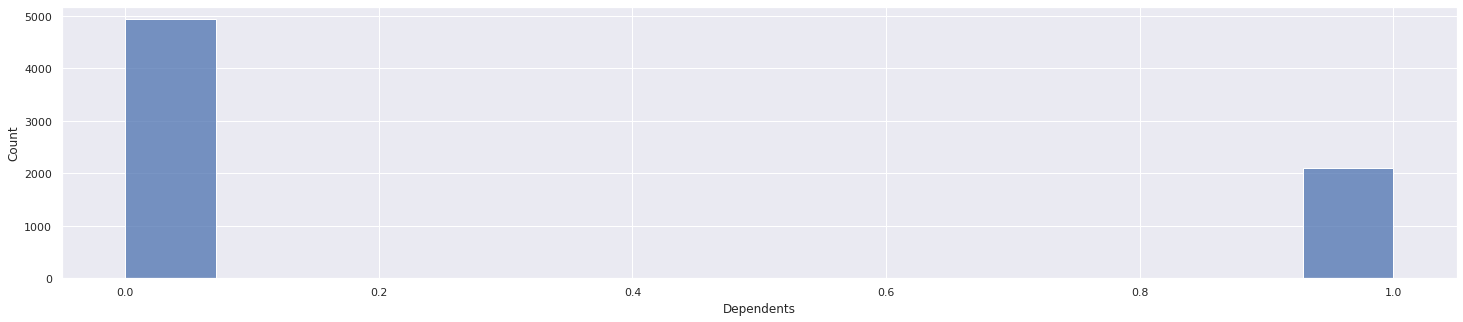

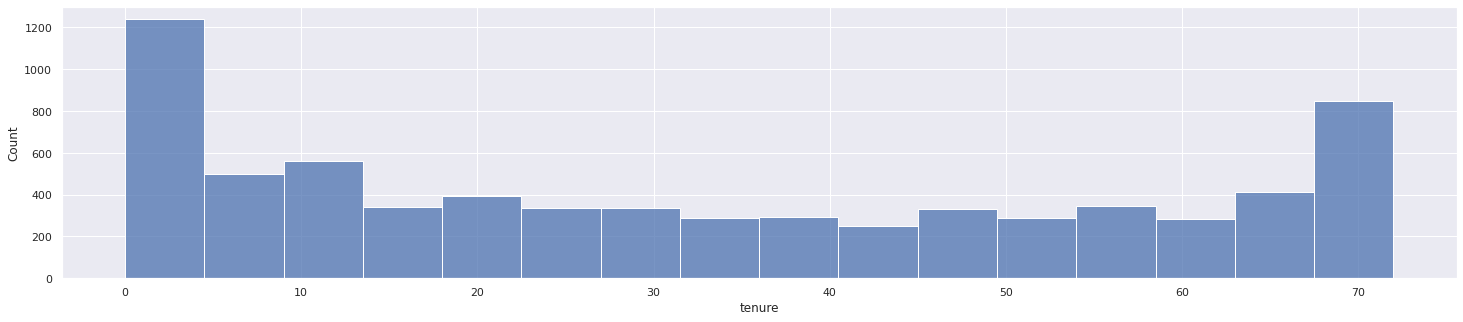

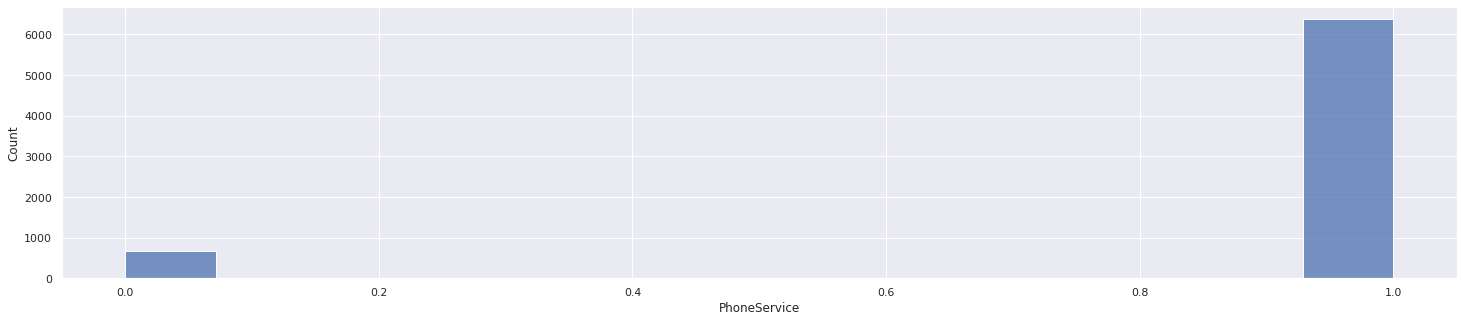

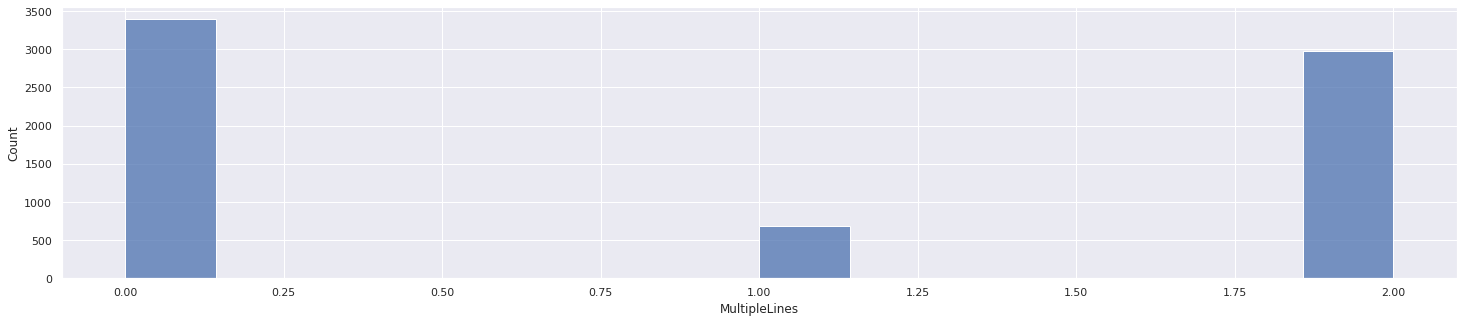

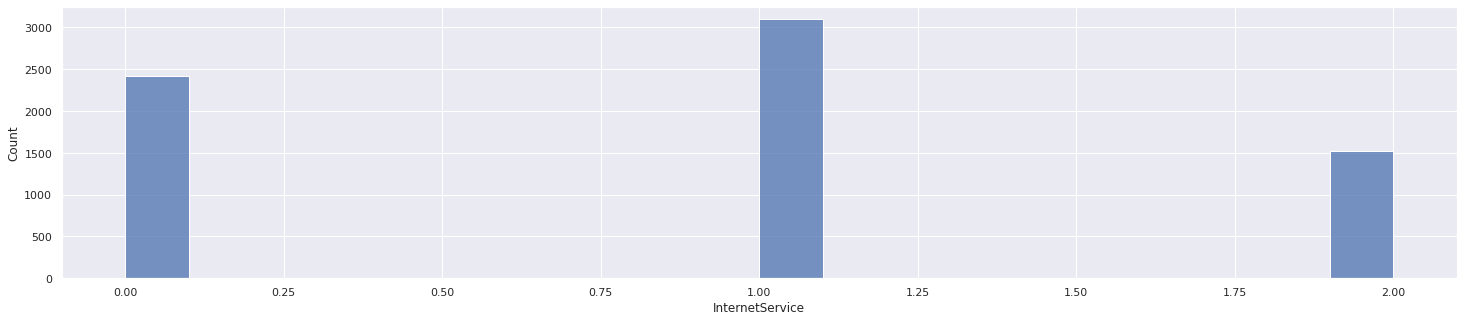

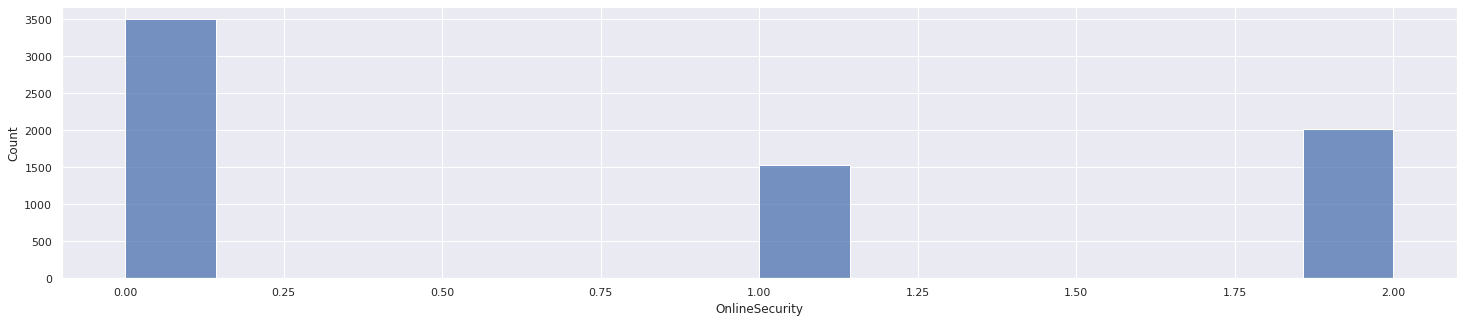

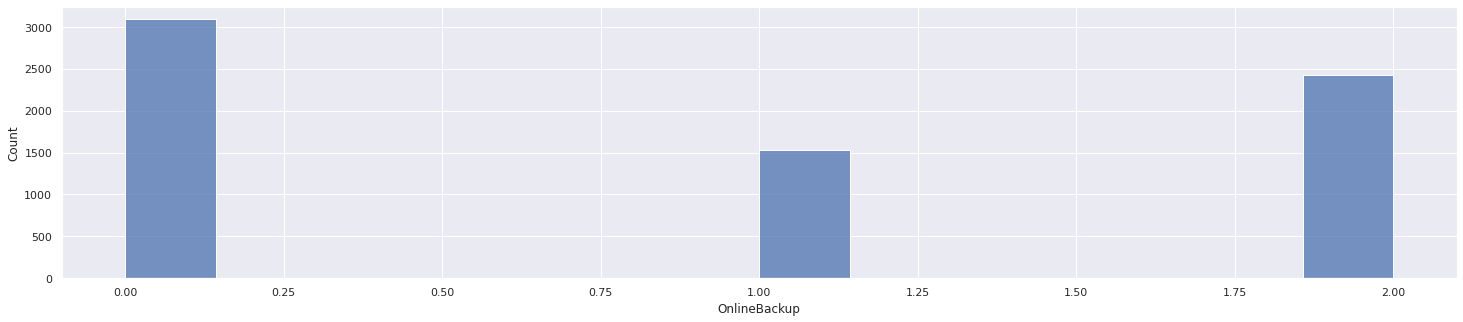

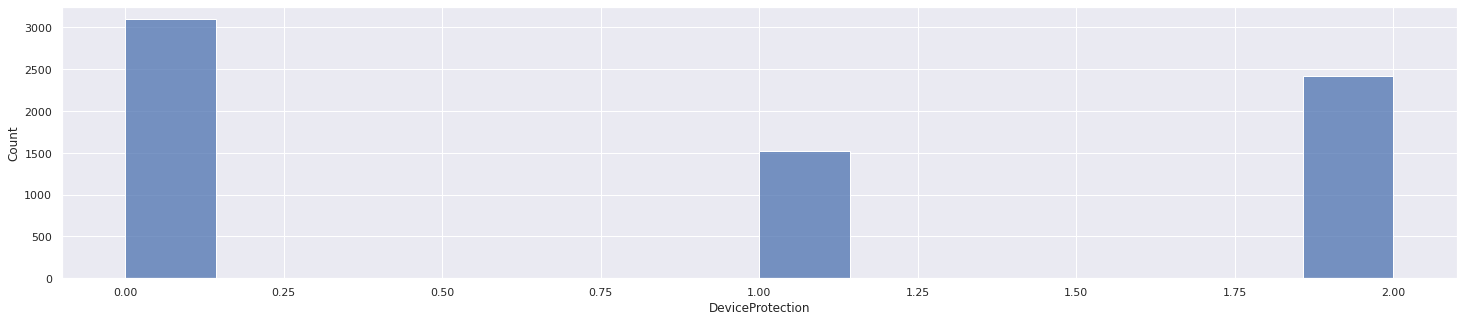

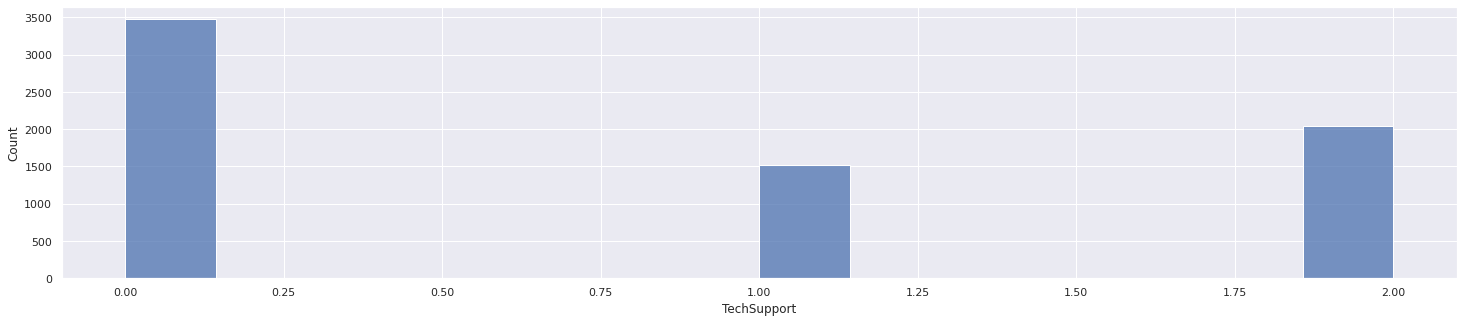

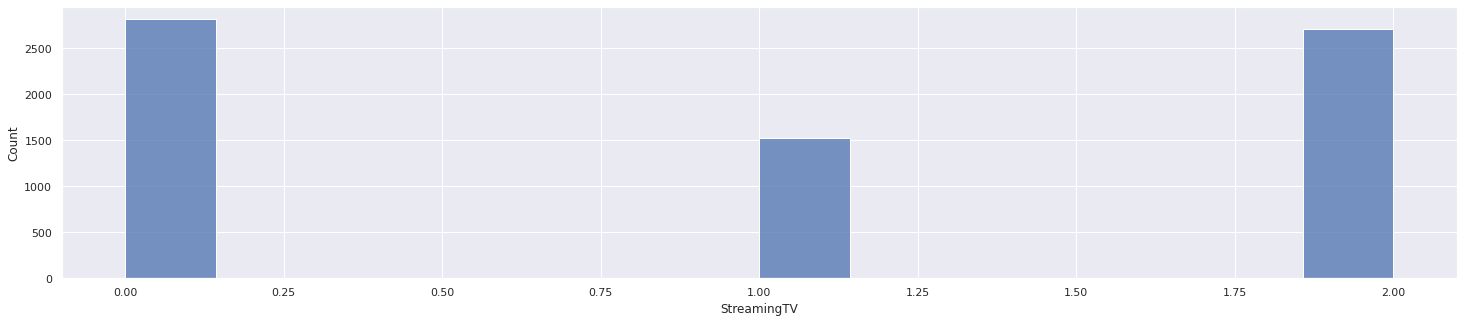

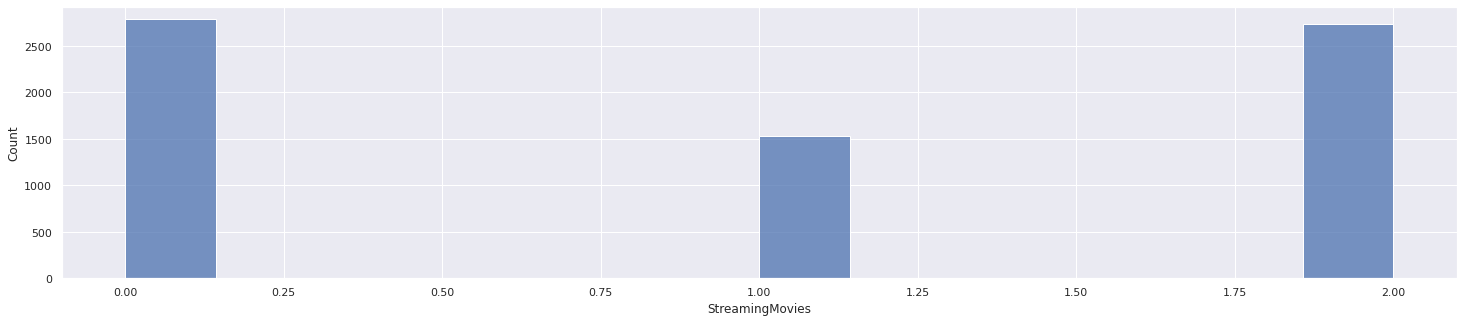

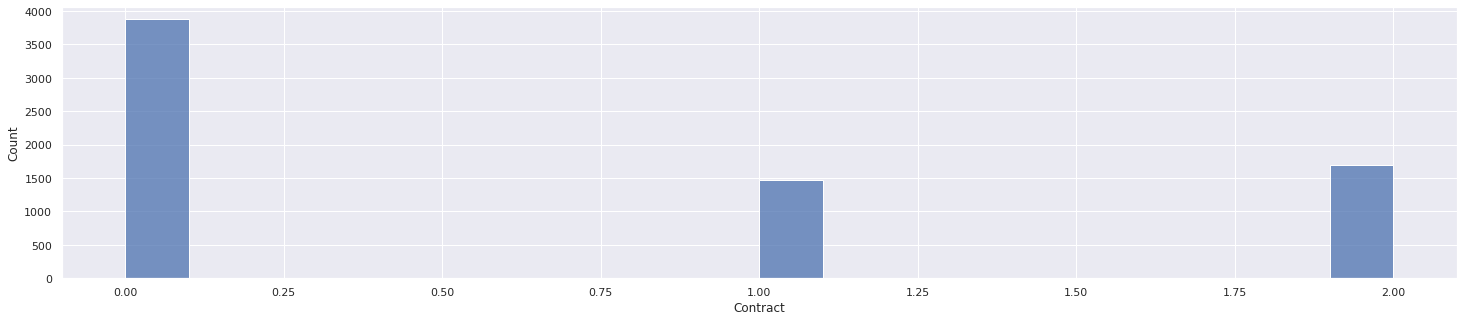

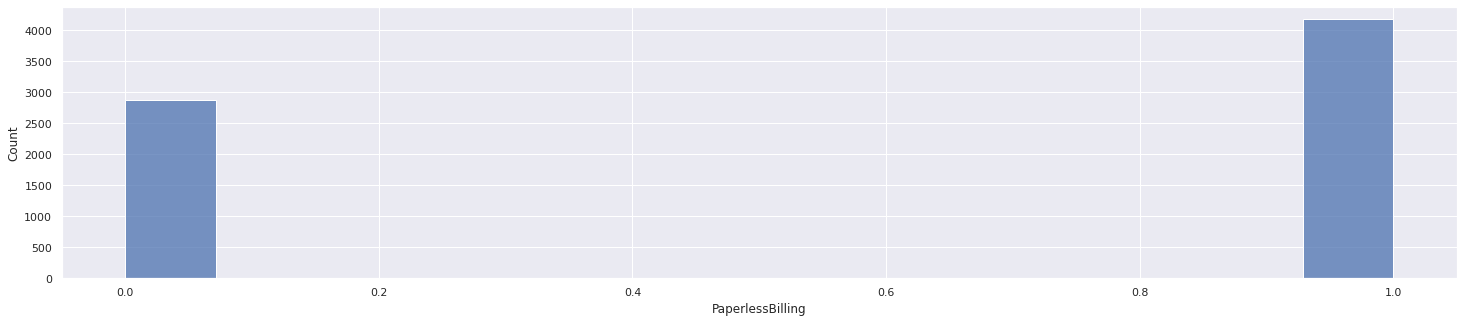

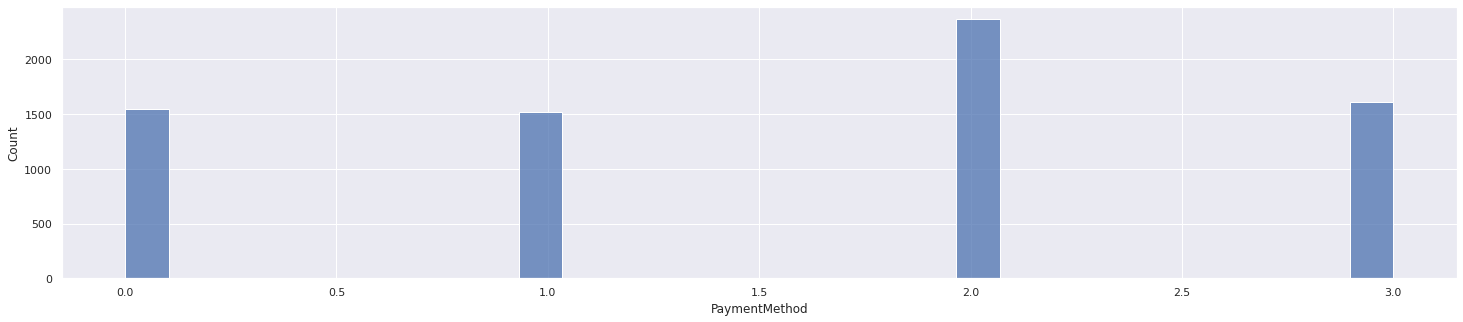

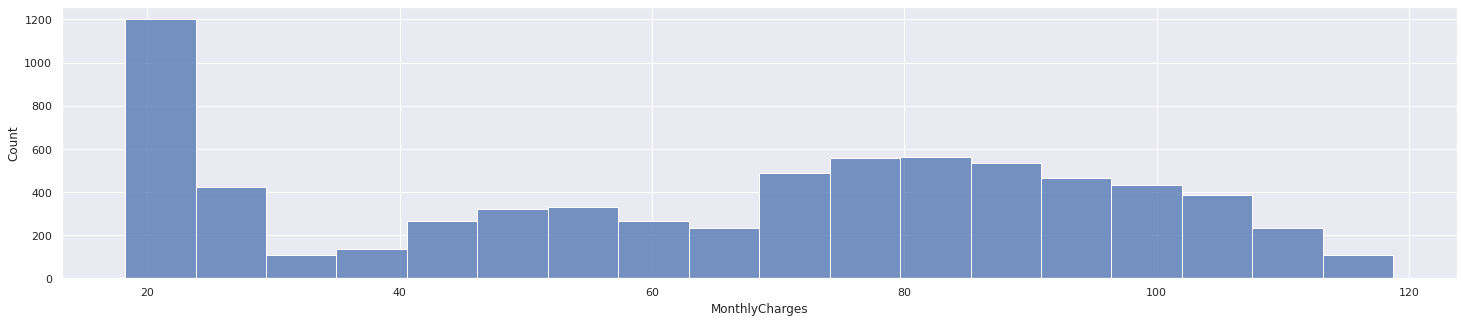

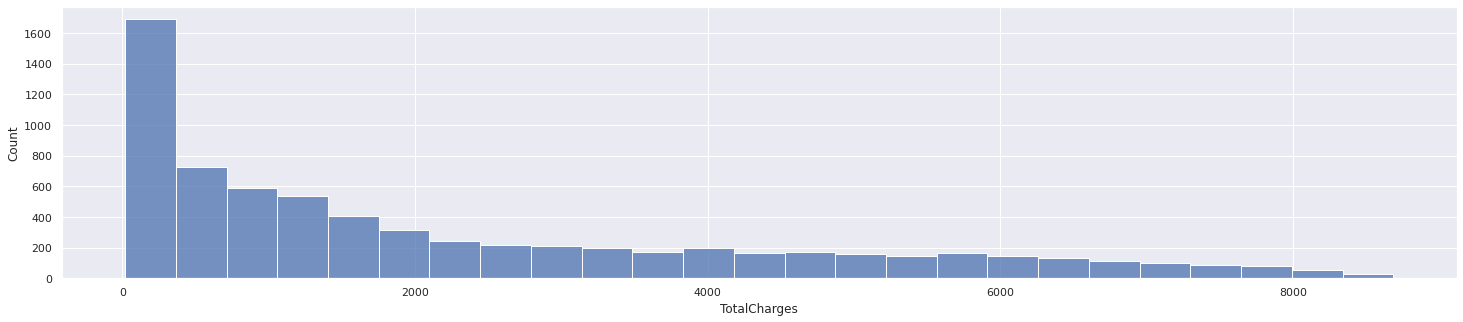

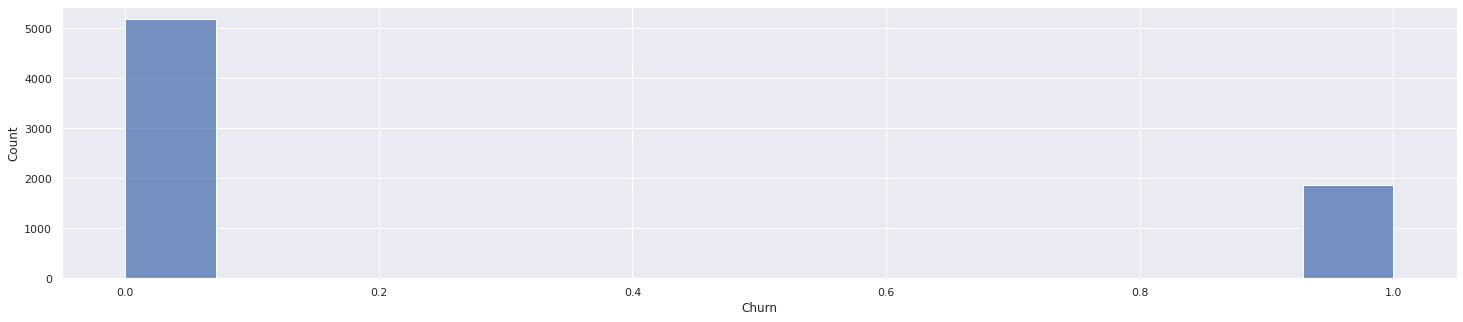

In [ ]:
sns.set(rc={'figure.figsize':(25,5)})
for col in list(df.columns):
    fig,ax = plt.subplots()
    sns.histplot(data=df[col])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 10
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   Float64
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64
 1

In [ ]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'])
df['MonthlyCharges'].dtype

dtype('float64')

In [ ]:
df['Churn'].unique()

array([0., 1.])

In [ ]:
list(df.iloc[:,0:19].columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
for col in ['gender','SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    pivot_table = pd.pivot_table(data = df, values= 'Churn',index= col, aggfunc='count')
    print('-------------------------------------------------')
    print(pivot_table)



-------------------------------------------------
        Churn
gender       
0.0      3488
1.0      3555
-------------------------------------------------
               Churn
SeniorCitizen       
0.0             5901
1.0             1142
-------------------------------------------------
         Churn
Partner       
0.0       3641
1.0       3402
-------------------------------------------------
            Churn
Dependents       
0.0          4933
1.0          2110
-------------------------------------------------
              Churn
PhoneService       
0.0             682
1.0            6361
-------------------------------------------------
               Churn
MultipleLines       
0.0             3390
1.0              682
2.0             2971
-------------------------------------------------
                 Churn
InternetService       
0.0               2421
1.0               3096
2.0               1526
-------------------------------------------------
                Churn
Online

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.00,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.00,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.00,1.00,2.00,2.00
OnlineBackup,7043.0,0.906432,0.880162,0.00,0.00,1.00,2.00,2.00


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:19],df.iloc[:,19], test_size=0.3, random_state=4320)
print(df.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(7043, 20) (4930, 19) (4930,) (2113, 19) (2113,)


In [ ]:
def scaler (d1):
    scaled_data = StandardScaler().fit_transform(d1)
    df_scaled = pd.DataFrame(scaled_data,columns = d1.columns)
    print(df_scaled.shape)
    print(df_scaled.head(1))
    print('-----------------------------------------------')
scaler(x_train)
scaler(x_test)

(4930, 19)
     gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0 -1.006104      -0.436172 -0.972389    1.524579 -0.995849       0.32653   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0      -0.988177         1.514596         0.23282      0.113528   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0          0.115402     0.230336     0.021831         0.012637 -0.834831   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0         -1.183298       1.342565       -1.472831     -0.926815  
-----------------------------------------------
(2113, 19)
    gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0  0.98264       -0.44861 -0.95329   -0.649568  0.046905     -3.034424   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0       0.054895         -1.16142       -0.892995      1.217692   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contrac

# Model building and Improvement

In [ ]:
def eval(actual,predicted):
    con_mat = confusion_matrix(actual,predicted)
    class_rep = classification_report(actual,predicted)
    acc_score = accuracy_score(actual,predicted)*100
    print('Accuracy is ', round(acc_score,2))
    print('Class Report \n',class_rep)
    print('Confusion Mat\n', con_mat)

def models(classifier,xtrain_data,xtest_data,ytrain_data,ytest_data): # getting the classifer and train and test data
    classifier.fit(xtrain_data,ytrain_data) # trainig the data with features and output
    tr_predicted = classifier.predict(xtrain_data) # predicting it based on the trained model
    tr_actual = ytrain_data
    te_predicted = classifier.predict(xtest_data)
    te_actual = ytest_data
    print('_____________Train Results____________')
    eval(tr_actual,tr_predicted)
    print('_____________Test Results____________')
    eval(te_actual,te_predicted)

In [ ]:
models(GradientBoostingClassifier(random_state = 4320),x_train, x_test, y_train, y_test)

NameError: ignored

In [ ]:
param_iter = {"learning_rate": [0.1,0.2,0.3,0.4,0.5],
              "n_estimators": [50,60,70,80,90,100,120,140,160,180,200],
              "min_samples_split": [3,4,5,6,7,8],
              "min_samples_leaf": [2,3,4,5,6],
              'max_depth' : [2,3,4,5,6,7]
              }

In [ ]:
randomCV = RandomizedSearchCV(GradientBoostingClassifier(),param_distributions = param_iter)

In [ ]:
randomCV.fit(x_train,y_train)

In [ ]:
randomCV.best_params_

In [ ]:
models(GradientBoostingClassifier(
                                n_estimators= 90,
                                min_samples_split= 8,
                                min_samples_leaf= 2,
                                learning_rate= 0.1,
                                max_depth = 2,
                                random_state = 4320),
       x_train, x_test, y_train, y_test)

In [ ]:
param_iter = {"learning_rate": [0.1,0.2,0.3],
              "n_estimators": [80,90,100],
              'max_depth': [ 4, 5, 6, 7],
              "min_samples_split": [7,8,9,10],
              "min_samples_leaf": [2,3]
              }

In [ ]:
gridCV = GridSearchCV(GradientBoostingClassifier(),param_grid = param_iter)

In [ ]:
gridCV.fit(x_train,y_train)

In [ ]:
gridCV.best_params_

In [ ]:
models(GradientBoostingClassifier(
                                n_estimators= 80,
                                min_samples_split= 9,
                                min_samples_leaf= 3,
                                max_depth= 4,
                                learning_rate= 0.1,
                                random_state = 4320),
       x_train, x_test, y_train, y_test)

In [ ]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/GL AIML/Progress/Mini Projects/Ensemble Techniques/MP_ET_NOTE/MP_ET_Completed.ipynb'